<a href="https://colab.research.google.com/github/aditya8075/Laptop-Price-Predictor----supervised-machine-learning----Regression/blob/main/laptop_price_prediction_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [360]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [361]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [362]:
df=pd.read_csv('/content/drive/MyDrive/laptop_data.csv')

In [363]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [364]:
df.shape

(1303, 12)

In [365]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [366]:
df=df.drop(['Unnamed: 0'],axis=1)

In [367]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [368]:
#cheaking the duplicates values

df.duplicated().sum()

29

In [369]:
df.drop_duplicates(keep=False,inplace=True)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 1260
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1260 non-null   object 
 1   TypeName          1260 non-null   object 
 2   Inches            1260 non-null   float64
 3   ScreenResolution  1260 non-null   object 
 4   Cpu               1260 non-null   object 
 5   Ram               1260 non-null   object 
 6   Memory            1260 non-null   object 
 7   Gpu               1260 non-null   object 
 8   OpSys             1260 non-null   object 
 9   Weight            1260 non-null   object 
 10  Price             1260 non-null   float64
dtypes: float64(2), object(9)
memory usage: 118.1+ KB


In [371]:
#lets see the catagorical columns and Integers

catvar=df.select_dtypes(include=['object']).columns
numvar=df.select_dtypes(include=['int32','int64','float32','float64']).columns
print(catvar)
print(numvar)

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')
Index(['Inches', 'Price'], dtype='object')


In [372]:
def uniquevals(col):
  print(f' details of perticular column {col} is :  {df[col].unique()}')

def valuecounts(col):
  print(f'value counts of perticular column  {col} is : {df[col].value_counts()}')



for col in df.columns:
  uniquevals(col)
  print('-'*75)

 details of perticular column Company is :  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
 details of perticular column TypeName is :  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
 details of perticular column Inches is :  [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
 details of perticular column ScreenResolution is :  ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscree

In [373]:
# so on observation we can see that if we remove 'GB' from Ram then I can make it as an integer same goes for memory 

In [374]:
df["Ram"]=df["Ram"].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [375]:
df['Weight']=df['Weight'].astype('float32')
df["Ram"]=df["Ram"].astype('int32')

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 1260
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1260 non-null   object 
 1   TypeName          1260 non-null   object 
 2   Inches            1260 non-null   float64
 3   ScreenResolution  1260 non-null   object 
 4   Cpu               1260 non-null   object 
 5   Ram               1260 non-null   int32  
 6   Memory            1260 non-null   object 
 7   Gpu               1260 non-null   object 
 8   OpSys             1260 non-null   object 
 9   Weight            1260 non-null   float32
 10  Price             1260 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 108.3+ KB



EXPLORATORY DATA ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


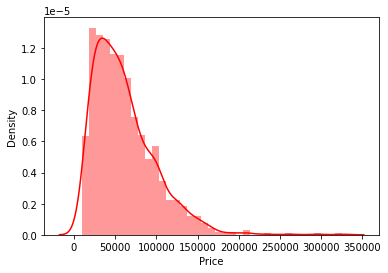

In [377]:
sns.distplot(df['Price'],color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

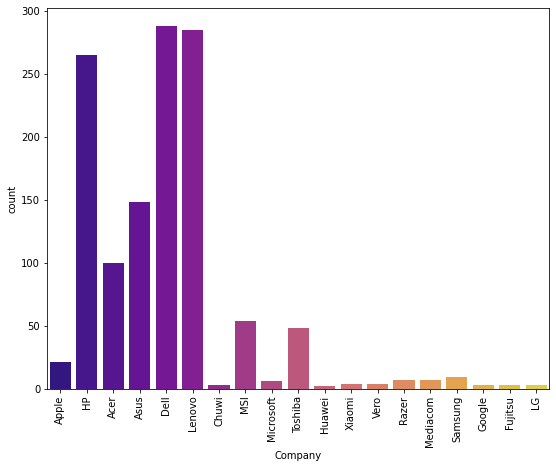

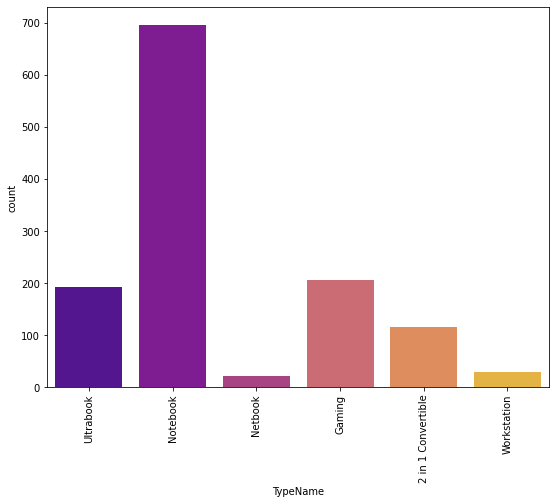

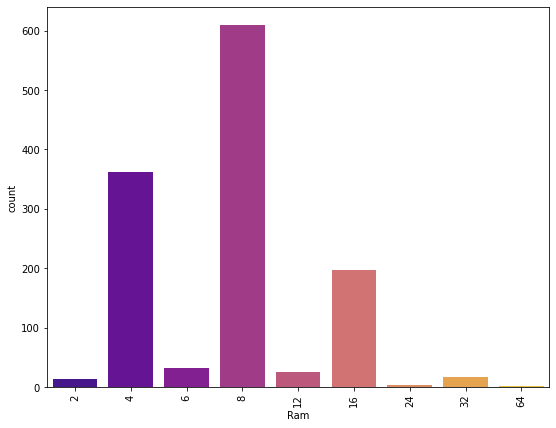

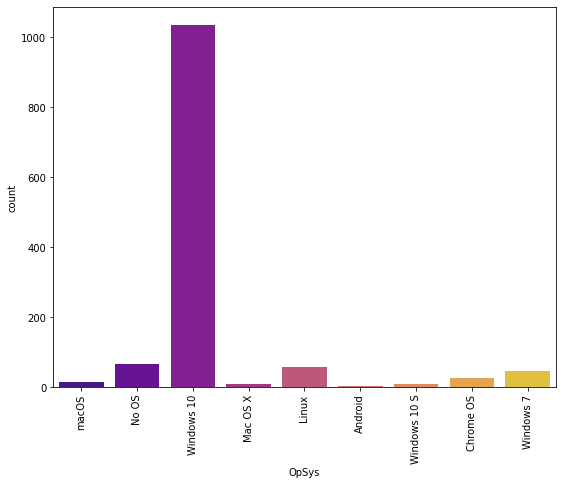

In [378]:
def drawplot(col):
   plt.figure(figsize=(9,7))
   sns.countplot(df[col],palette='plasma')
   plt.xticks(rotation='vertical')

toview=['Company','TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

In [379]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

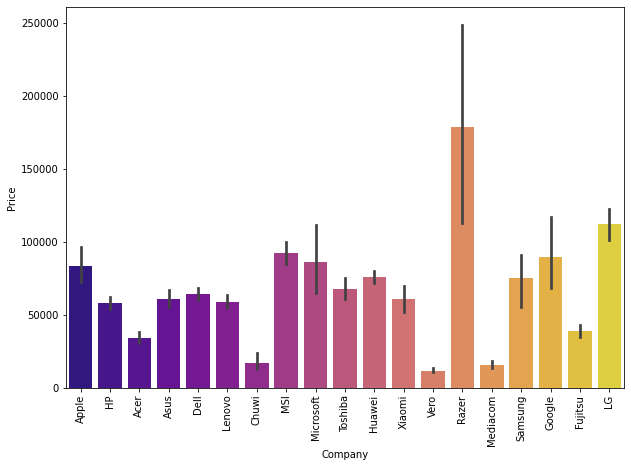

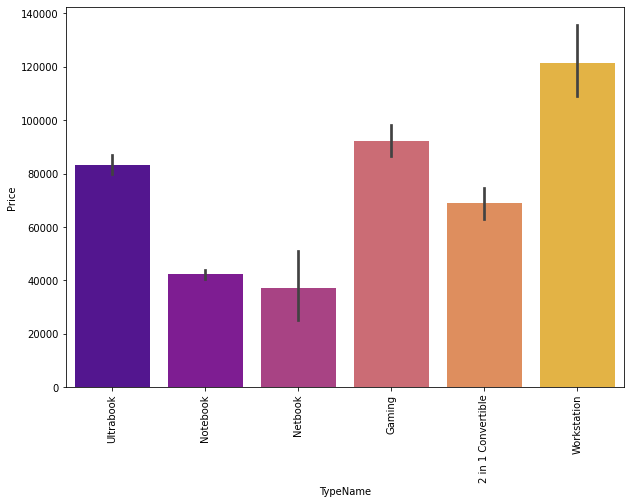

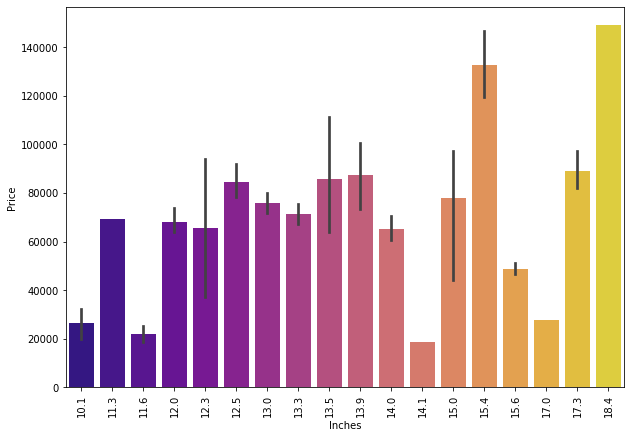

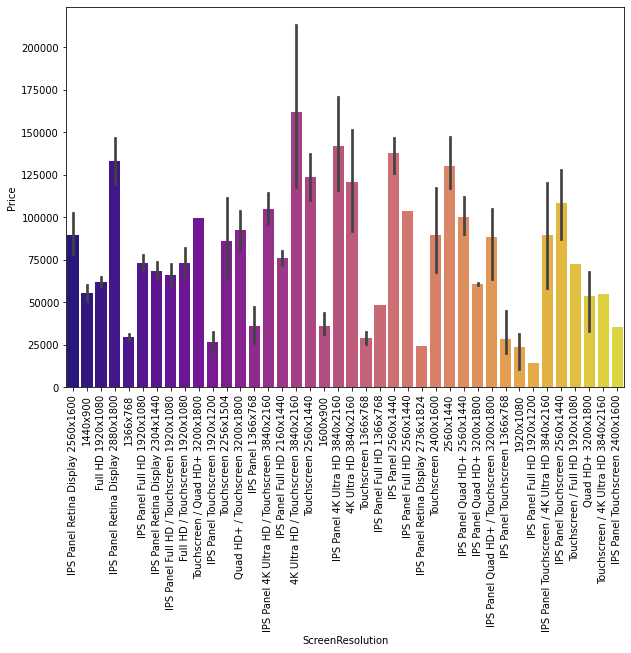

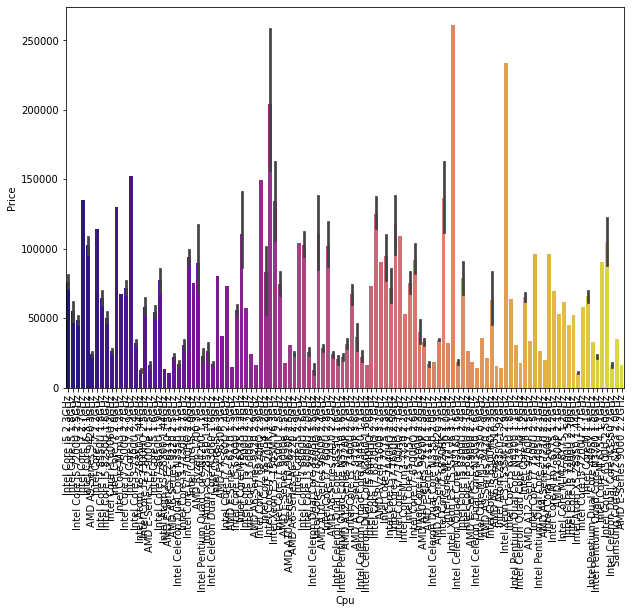

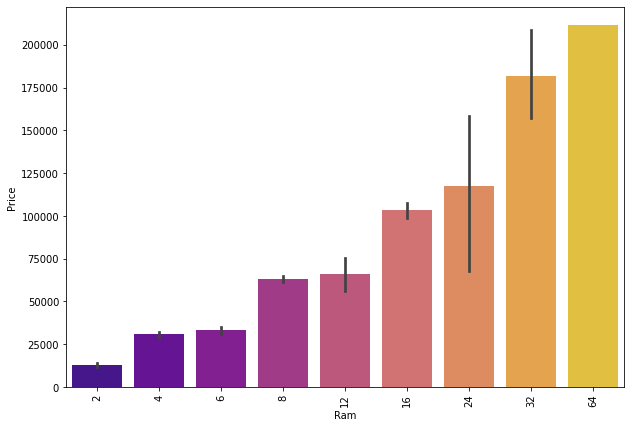

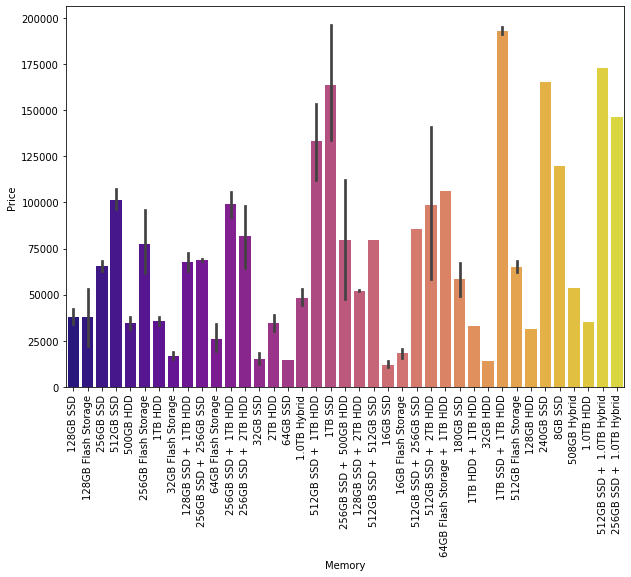

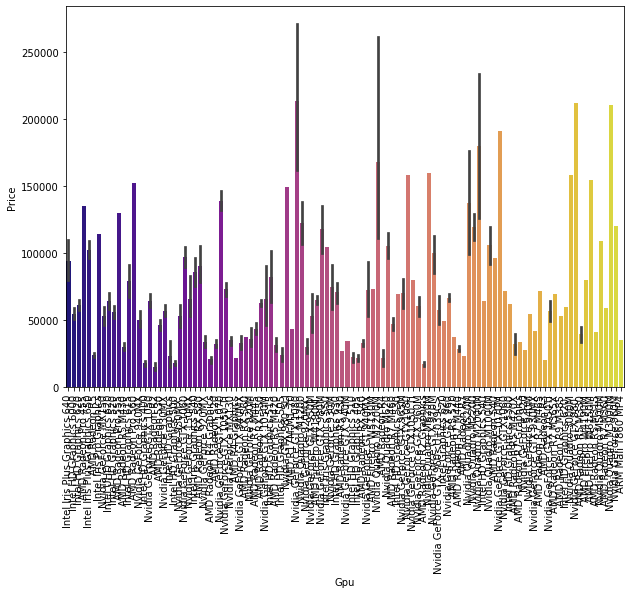

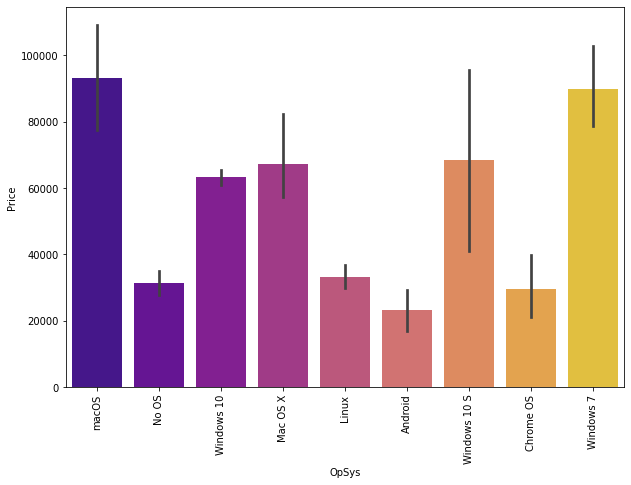

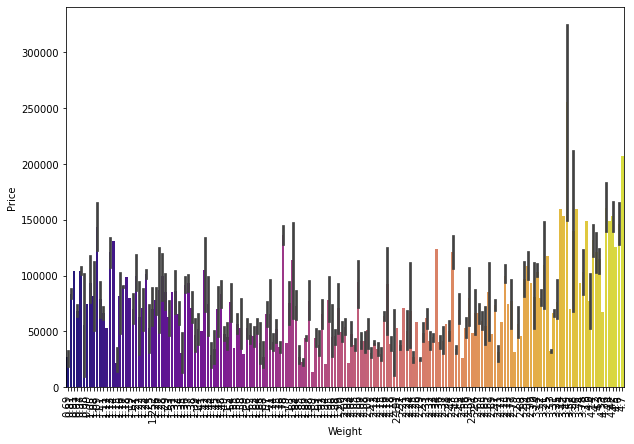

In [380]:
def drawplot(col,price):
    plt.figure(figsize=(10,7))
    sns.barplot(x=df[col],y=df[price],palette='plasma')
    plt.xticks(rotation='vertical')

features=['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight']
Lebel=["Price"]
for col  in features:
  for price in Lebel: 
    drawplot(col,price)

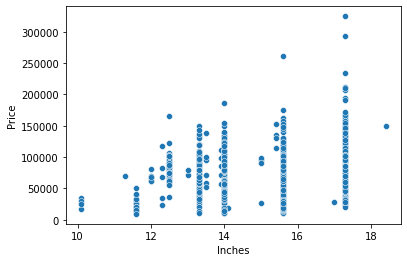

In [381]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [382]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [383]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                504
1366x768                                         253
IPS Panel Full HD 1920x1080                      224
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Touchscreen 1920x1200               

In [384]:
df['TouchScreen']=df["ScreenResolution"].apply(lambda element : 1 if 'Touchscreen' in element else 0)

In [385]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [386]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1256,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.00,101232.0000,0
1257,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.29,26107.2000,0
1258,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32,47685.6000,0
1259,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.40,65481.1200,0
1260,Lenovo,2 in 1 Convertible,14.0,Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,44382.7728,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


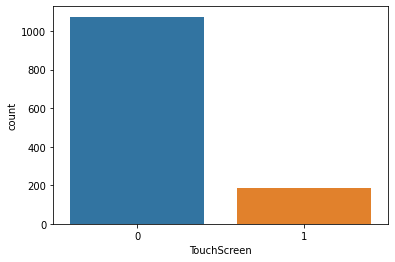

In [387]:
sns.countplot(df['TouchScreen'])

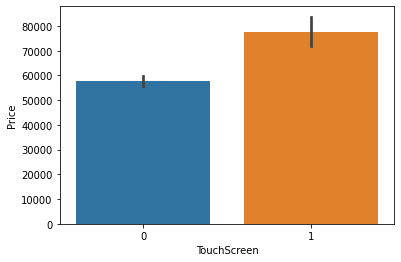

In [388]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [389]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen'],
      dtype='object')

In [390]:
df['IPS Panel']=df["ScreenResolution"].apply(lambda element : 1 if 'IPS Panel' in element else 0)

In [391]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel
230,Asus,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.37,21258.1872,0,0
183,Toshiba,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,2.00,42251.0400,0,0
200,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,98301.6000,0,1
500,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,64GB Flash Storage,Intel HD Graphics 500,Windows 10 S,1.20,18115.2000,0,0
207,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.21,103842.7200,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


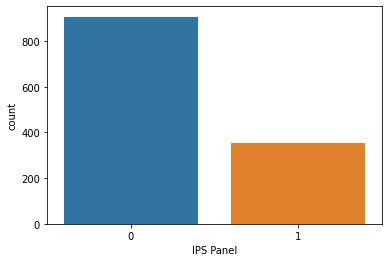

In [392]:
sns.countplot(df['IPS Panel'])

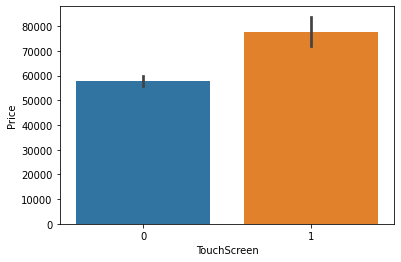

In [393]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

EXTRACTING THE X RESOLUTION AND Y RESOLUTION

In [394]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen',
       'IPS Panel'],
      dtype='object')

In [395]:
splitdf=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [396]:
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [397]:
df['X_res']=splitdf[0]
df['Y_res']=splitdf[1]

In [398]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res
1142,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,86793.1200,1,0,Full HD / Touchscreen 1920,1080
996,HP,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.11,71874.7200,1,1,IPS Panel Full HD / Touchscreen 1920,1080
513,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.20,64961.1072,0,0,Full HD 1920,1080
590,Asus,2 in 1 Convertible,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 520,Windows 10,2.20,39373.9200,1,0,Touchscreen 1366,768
1214,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.90,103842.7200,0,0,Full HD 1920,1080


In [399]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x : x[0])

In [400]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res
143,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,32074.56,0,0,1366,768
298,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6,1TB HDD,AMD Radeon R5 430,Windows 10,2.40,26586.72,0,0,1920,1080
1188,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Linux,1.23,58554.72,1,0,3200,1800
329,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,140605.92,1,0,3840,2160
615,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,62231.04,0,0,1920,1080


In [401]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 1260
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1260 non-null   object 
 1   TypeName          1260 non-null   object 
 2   Inches            1260 non-null   float64
 3   ScreenResolution  1260 non-null   object 
 4   Cpu               1260 non-null   object 
 5   Ram               1260 non-null   int32  
 6   Memory            1260 non-null   object 
 7   Gpu               1260 non-null   object 
 8   OpSys             1260 non-null   object 
 9   Weight            1260 non-null   float32
 10  Price             1260 non-null   float64
 11  TouchScreen       1260 non-null   int64  
 12  IPS Panel         1260 non-null   int64  
 13  X_res             1260 non-null   int64  
 14  Y_res             1260 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 179.9+ KB


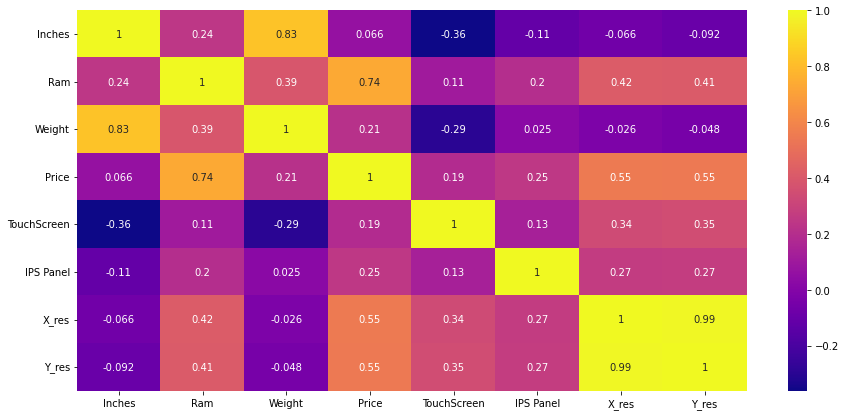

In [403]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [404]:
df.corr()['Price']

Inches         0.066136
Ram            0.738675
Weight         0.212959
Price          1.000000
TouchScreen    0.187438
IPS Panel      0.249624
X_res          0.549926
Y_res          0.545837
Name: Price, dtype: float64

In [405]:
df['PPI']=(((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [406]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI
268,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,54239.0400,0,0,1920,1080,127.335675
988,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,39906.7200,0,0,1366,768,100.454670
42,Asus,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Linux,2.30,27864.9072,0,0,1366,768,100.454670
118,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.00,30049.9200,0,0,1920,1080,127.335675
871,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,No OS,2.20,25521.1200,0,0,1920,1080,141.211998


In [407]:
df.corr()['Price']

Inches         0.066136
Ram            0.738675
Weight         0.212959
Price          1.000000
TouchScreen    0.187438
IPS Panel      0.249624
X_res          0.549926
Y_res          0.545837
PPI            0.467702
Name: Price, dtype: float64

In [408]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS Panel',
       'X_res', 'Y_res', 'PPI'],
      dtype='object')

In [409]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


NOW WE WILL WORK ON CPU COLUMN

In [410]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              131
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core i3 6100U 2.1GHz                1
AMD E-Series E2-9000 2.2GHz               1
Intel Celeron Dual Core N3050 1.6GHz      1
Intel Core i5 2.9GHz                      1
AMD E-Series 9000 2.2GHz                  1
Name: Cpu, Length: 116, dtype: int64

In [411]:
df['Cpu']

0              Intel Core i5 2.3GHz
1              Intel Core i5 1.8GHz
2        Intel Core i5 7200U 2.5GHz
3              Intel Core i7 2.7GHz
4              Intel Core i5 3.1GHz
                   ...             
1256    Intel Core i7 6700HQ 2.6GHz
1257       Intel Core i3 6006U 2GHz
1258     Intel Core i7 6500U 2.5GHz
1259    Intel Core i7 6700HQ 2.6GHz
1260     Intel Core i5 6200U 2.3GHz
Name: Cpu, Length: 1260, dtype: object

In [412]:
text='Intel Core i5 2.3GHz'

In [413]:
' '.join(text.split()[:3])

'Intel Core i5'

In [414]:
df["CPU_name"]=df['Cpu'].apply(lambda text : " ".join(text.split()[:3]))

In [415]:
def processsortype(text):
    if text=='Intel Core i3' or text=='Intel Core i5' or text=='Intel Core i7':
        return text


    else:
          if text.split()[0]=='Intel':
            return 'Other Intel Processor'

          else :
            return 'AMD Processor'

In [416]:
df["CPU_name"]=df["CPU_name"].apply(lambda text : processsortype(text))
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name
59,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,22111.200,0,0,1920,1080,141.211998,Intel Core i3
96,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.20,31962.672,0,0,1920,1080,141.211998,Intel Core i7
1184,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,6,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.18,42570.720,0,1,1920,1080,141.211998,Intel Core i7
427,Dell,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Linux,1.60,58554.720,0,0,1920,1080,157.350512,Intel Core i7
354,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Nvidia GeForce 930M,Windows 10,2.40,74751.840,0,1,1920,1080,141.211998,Intel Core i7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

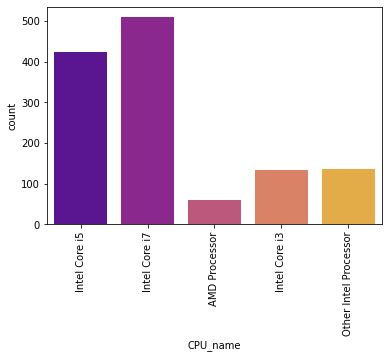

In [417]:
sns.countplot(df['CPU_name'],palette='plasma')
plt.xticks(rotation='vertical')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

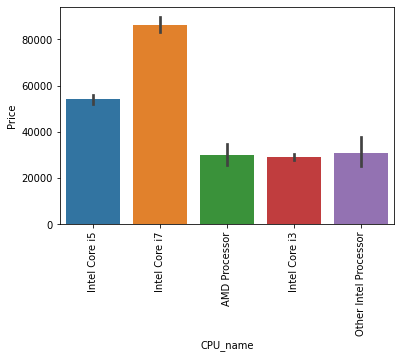

In [418]:
sns.barplot(df['CPU_name'],df['Price'])
plt.xticks(rotation='vertical')

In [419]:
#droping the cpu column
df.drop(columns='Cpu',inplace=True)

In [420]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


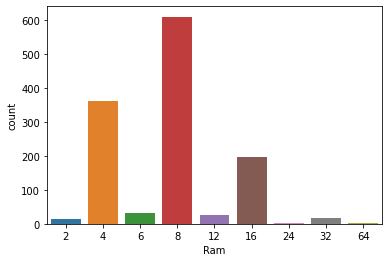

In [421]:
sns.countplot(df['Ram'])

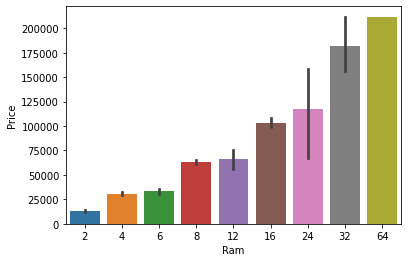

In [422]:
#Ram is having good relation with price
sns.barplot(x=df['Ram'],y=df['Price'])

In [423]:
#about the memory column
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          211
500GB HDD                        119
512GB SSD                        112
128GB SSD +  1TB HDD              94
128GB SSD                         73
256GB SSD +  1TB HDD              73
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
1.0TB Hybrid                       6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [424]:
df['Memory']=df['Memory'].astype(str).replace('\.0',' ',regex=True)
df['Memory']=df['Memory'].str.replace('GB',' ')
df['Memory']=df['Memory'].str.replace('TB','000')
#split the word across the '+' charector
newdf=df['Memory'].str.split('+',n=1,expand=True)




In [425]:
newdf.sample(5)

,0,1
1164,500 HDD,None
825,128 SSD,None
781,256 SSD,1000 HDD
922,256 SSD,None
332,256 SSD,1000 HDD


In [426]:
df['first']=newdf[0]
df['first'].str.strip()


0                 128  SSD
1       128  Flash Storage
2                 256  SSD
3                 512  SSD
4                 256  SSD
               ...        
1256              128  SSD
1257              500  HDD
1258          1 000 Hybrid
1259              128  SSD
1260              128  SSD
Name: first, Length: 1260, dtype: object

In [427]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,first
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,256 SSD
5,Acer,Notebook,15.6,1366x768,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,1366,768,100.454670,AMD Processor,500 HDD
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,2880,1800,220.534624,Intel Core i7,256 Flash Storage
7,Apple,Ultrabook,13.3,1440x900,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1440,900,127.677940,Intel Core i5,256 Flash Storage
8,Asus,Ultrabook,14.0,Full HD 1920x1080,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,1920,1080,157.350512,Intel Core i7,512 SSD
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,1920,1080,157.350512,Intel Core i5,256 SSD


In [428]:
def applychanges(values):
     df['Layer1' + values]=df['first'].apply(lambda x : 1 if values in x else 0)

listapply=['SSD','HDD','Hybrid','Flash Storage']
for values in listapply:
    applychanges(values)


In [429]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,IPS Panel,X_res,Y_res,PPI,CPU_name,first,Layer1SSD,Layer1HDD,Layer1Hybrid,Layer1Flash Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,1,2560,1600,226.983005,Intel Core i5,128 SSD,1,0,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,0,1440,900,127.677940,Intel Core i5,128 Flash Storage,0,0,0,1
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,1920,1080,141.211998,Intel Core i5,256 SSD,1,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,1,2880,1800,220.534624,Intel Core i7,512 SSD,1,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,1,2560,1600,226.983005,Intel Core i5,256 SSD,1,0,0,0


In [430]:
df['first']=df['first'].str.replace(r'\D','')
df['first'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


256     508
1000    235
128     174
512     134
500     119
32       42
2000     16
64       14
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [431]:
df['second']=newdf[1]
df.head()


,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,X_res,Y_res,PPI,CPU_name,first,Layer1SSD,Layer1HDD,Layer1Hybrid,Layer1Flash Storage,second
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,2560,1600,226.983005,Intel Core i5,128,1,0,0,0,None
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,1440,900,127.677940,Intel Core i5,128,0,0,0,1,None
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,1920,1080,141.211998,Intel Core i5,256,1,0,0,0,None
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,2880,1800,220.534624,Intel Core i7,512,1,0,0,0,None
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,2560,1600,226.983005,Intel Core i5,256,1,0,0,0,None


In [432]:
def applychanges(values):
     df['Layer2' + values]=df['second'].apply(lambda x : 1 if values in x else 0)

listapply1=['SSD','HDD','Hybrid','Flash Storage']
df['second']=df['second'].fillna('0')
for values in listapply1:
    applychanges(values)

In [433]:
df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,first,Layer1SSD,Layer1HDD,Layer1Hybrid,Layer1Flash Storage,second,Layer2SSD,Layer2HDD,Layer2Hybrid,Layer2Flash Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,128,1,0,0,0,0,0,0,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,128,0,0,0,1,0,0,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,256,1,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,512,1,0,0,0,0,0,0,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,256,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 970M,Windows 10,4.00,101232.0000,...,128,1,0,0,0,1000 HDD,0,1,0,0
1257,Dell,Notebook,15.6,1366x768,4,500 HDD,Intel HD Graphics 520,Windows 10,2.29,26107.2000,...,500,0,1,0,0,0,0,0,0,0
1258,Lenovo,Notebook,15.6,Full HD 1920x1080,8,1 000 Hybrid,AMD Radeon R5 M330,Windows 7,2.32,47685.6000,...,1000,0,0,1,0,0,0,0,0,0
1259,MSI,Gaming,15.6,Full HD 1920x1080,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.40,65481.1200,...,128,1,0,0,0,1000 HDD,0,1,0,0


In [434]:
df['second']=df['second'].str.replace(r'\D','')
df['second'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0       1052
1000     187
2000      15
256        3
500        2
512        1
Name: second, dtype: int64

In [435]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS Panel', 'X_res',
       'Y_res', 'PPI', 'CPU_name', 'first', 'Layer1SSD', 'Layer1HDD',
       'Layer1Hybrid', 'Layer1Flash Storage', 'second', 'Layer2SSD',
       'Layer2HDD', 'Layer2Hybrid', 'Layer2Flash Storage'],
      dtype='object')

In [436]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS Panel', 'X_res',
       'Y_res', 'PPI', 'CPU_name', 'first', 'Layer1SSD', 'Layer1HDD',
       'Layer1Hybrid', 'Layer1Flash Storage', 'second', 'Layer2SSD',
       'Layer2HDD', 'Layer2Hybrid', 'Layer2Flash Storage'],
      dtype='object')

In [437]:

df['second']=df['second'].astype('int')
df['first']=df['first'].astype('int')

In [438]:
df['HDD']=(df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD'] + df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid'] + df['second']*df['Layer2Hybrid'])
df['Flash Storage']=(df['first']*df['Layer1Flash Storage'] + df['second']*df['Layer2Flash Storage'])

In [439]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,Layer1Flash Storage,second,Layer2SSD,Layer2HDD,Layer2Hybrid,Layer2Flash Storage,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,1,0,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,0,0,0,0,0,0,0,256,0,0


In [440]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Price', 'TouchScreen', 'IPS Panel', 'X_res',
       'Y_res', 'PPI', 'CPU_name', 'first', 'Layer1SSD', 'Layer1HDD',
       'Layer1Hybrid', 'Layer1Flash Storage', 'second', 'Layer2SSD',
       'Layer2HDD', 'Layer2Hybrid', 'Layer2Flash Storage', 'HDD', 'SSD',
       'Hybrid', 'Flash Storage'],
      dtype='object')

In [441]:
df1=df.copy()

In [442]:
df1

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,...,Layer1Flash Storage,second,Layer2SSD,Layer2HDD,Layer2Hybrid,Layer2Flash Storage,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,1,0,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,0,0,0,0,0,0,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 970M,Windows 10,4.00,101232.0000,...,0,1000,0,1,0,0,1000,128,0,0
1257,Dell,Notebook,15.6,1366x768,4,500 HDD,Intel HD Graphics 520,Windows 10,2.29,26107.2000,...,0,0,0,0,0,0,500,0,0,0
1258,Lenovo,Notebook,15.6,Full HD 1920x1080,8,1 000 Hybrid,AMD Radeon R5 M330,Windows 7,2.32,47685.6000,...,0,0,0,0,0,0,0,0,1000,0
1259,MSI,Gaming,15.6,Full HD 1920x1080,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.40,65481.1200,...,0,1000,0,1,0,0,1000,128,0,0


In [443]:
df1.drop(columns=['ScreenResolution','Layer1SSD', 'Layer1HDD',
       'Layer1Hybrid', 'Layer1Flash Storage','second', 'Layer2SSD',
       'Layer2HDD', 'Layer2Hybrid', 'Layer2Flash Storage'],inplace=True)

In [444]:
df1.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,first,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,128,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,128,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,256,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,512,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,256,0,256,0,0


In [445]:
df1.drop(columns=['Inches'],inplace=True)

In [446]:
df=df1.copy()

In [447]:
df.corr()['Price']

Ram              0.738675
Weight           0.212959
Price            1.000000
TouchScreen      0.187438
IPS Panel        0.249624
X_res            0.549926
Y_res            0.545837
PPI              0.467702
first           -0.121190
HDD             -0.098866
SSD              0.669620
Hybrid           0.031472
Flash Storage   -0.035387
Name: Price, dtype: float64

In [448]:
df.drop(columns=['first'],inplace=True)

In [449]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,HDD,SSD,Hybrid,Flash Storage
1117,Razer,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.250,54825.1200,1,0,3840,2160,352.465147,Intel Core i7,0,256,0,0
469,Lenovo,Ultrabook,12,256 SSD,Intel HD Graphics 520,Windows 10,1.400,98994.2400,0,1,2560,1440,209.800683,Intel Core i7,0,256,0,0
1213,Dell,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,2.191,53226.7200,1,1,1920,1080,141.211998,Intel Core i5,0,256,0,0
448,MSI,Gaming,8,256 SSD,Nvidia GeForce GTX 1050,Windows 10,2.200,54757.9872,0,0,1920,1080,141.211998,Intel Core i5,0,256,0,0
730,Acer,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,4.200,103096.8000,0,1,1920,1080,127.335675,Intel Core i7,1000,128,0,0


In [450]:
df.drop(columns=['Memory'],inplace=True)

In [451]:
df.corr()['Price']

Ram              0.738675
Weight           0.212959
Price            1.000000
TouchScreen      0.187438
IPS Panel        0.249624
X_res            0.549926
Y_res            0.545837
PPI              0.467702
HDD             -0.098866
SSD              0.669620
Hybrid           0.031472
Flash Storage   -0.035387
Name: Price, dtype: float64

In [452]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS Panel', 'X_res', 'Y_res', 'PPI', 'CPU_name', 'HDD',
       'SSD', 'Hybrid', 'Flash Storage'],
      dtype='object')

In [453]:
df.drop(columns=['Hybrid','Flash Storage'],inplace=True)

In [454]:
df['Gpu'].value_counts()

Intel HD Graphics 620      278
Intel HD Graphics 520      179
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [455]:
a=df['Gpu'][0]

In [456]:
a

'Intel Iris Plus Graphics 640'

In [457]:
print(a.split()[0])

Intel


In [458]:
df['Gpu Brand']=df['Gpu'].apply(lambda x : x.split()[0])

In [459]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,HDD,SSD,Gpu Brand
451,Dell,Workstation,16,Nvidia Quadro M620,Windows 10,2.17,105228.000,0,1,1920,1080,141.211998,Intel Core i7,0,256,Nvidia
712,Dell,Notebook,8,Intel HD Graphics 620,Linux,1.98,38681.280,0,0,1920,1080,141.211998,Intel Core i5,1000,0,Intel
504,Lenovo,Netbook,4,Intel HD Graphics 400,Chrome OS,1.25,14119.200,0,0,1366,768,135.094211,Other Intel Processor,0,16,Intel
446,Acer,Notebook,4,Intel HD Graphics 620,Linux,2.40,23539.104,0,0,1366,768,100.454670,Intel Core i5,500,0,Intel
514,Xiaomi,Notebook,16,Nvidia GeForce MX150,No OS,1.95,74589.336,0,1,1920,1080,141.211998,Intel Core i7,0,256,Nvidia


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


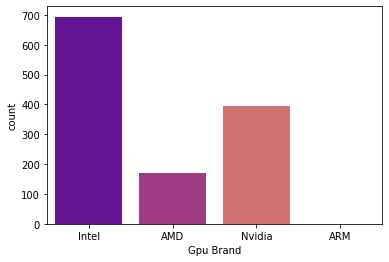

In [460]:
sns.countplot(df['Gpu Brand'],palette='plasma')

In [461]:
df=df[df['Gpu Brand'] != 'ARM']

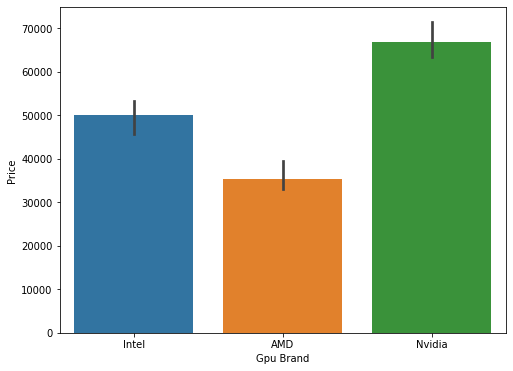

In [462]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Gpu Brand'],y=df['Price'],estimator=np.median)

In [463]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS Panel', 'X_res', 'Y_res', 'PPI', 'CPU_name', 'HDD',
       'SSD', 'Gpu Brand'],
      dtype='object')

In [464]:
df.drop(['Gpu'],inplace=True,axis=1)

In [465]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,HDD,SSD,Gpu Brand
876,Asus,Notebook,4,Linux,2.00,21258.1872,0,0,1366,768,100.454670,Other Intel Processor,1000,0,Intel
760,Lenovo,Gaming,8,Windows 10,2.50,55837.4400,0,1,1920,1080,141.211998,Intel Core i7,1000,128,Nvidia
203,Lenovo,Gaming,16,Windows 10,3.20,93186.7200,0,1,1920,1080,141.211998,Intel Core i7,1000,512,Nvidia
349,Dell,Ultrabook,8,Windows 10,1.90,35324.6400,0,0,1920,1080,141.211998,Intel Core i5,1000,0,AMD
911,HP,Ultrabook,8,Windows 10,1.09,165168.0000,1,0,3840,2160,352.465147,Other Intel Processor,0,240,Intel


In [466]:
df['OpSys'].value_counts()

Windows 10      1035
No OS             66
Linux             56
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

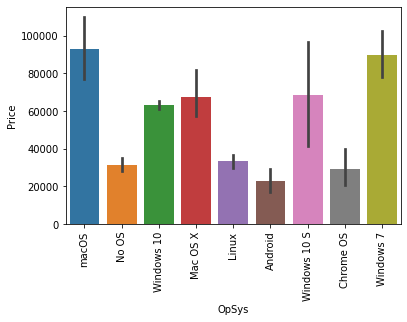

In [467]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

In [468]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [469]:
def setcatagory(text):
    
    if text =='Windows 10' or text =='Windows 7' or text == 'Windows 10 S':
        return 'Windows'

     
    elif text=='macOS'or text=='Mac OS X':
       
        return 'Mac OS'

    else:
        return 'Others'


df['OpSys']=df['OpSys'].apply(lambda x : setcatagory(x))

In [470]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,X_res,Y_res,PPI,CPU_name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac OS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac OS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,1920,1080,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac OS,1.83,135195.3360,0,1,2880,1800,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac OS,1.37,96095.8080,0,1,2560,1600,226.983005,Intel Core i5,0,256,Intel


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


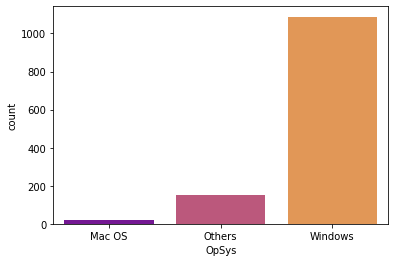

In [471]:
sns.countplot(df['OpSys'],palette='plasma')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

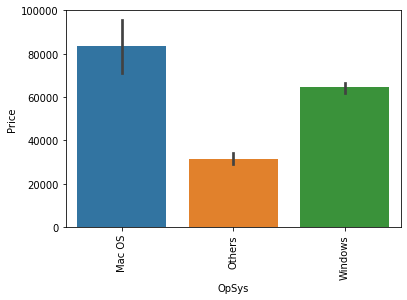

In [472]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

WEIGHT ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


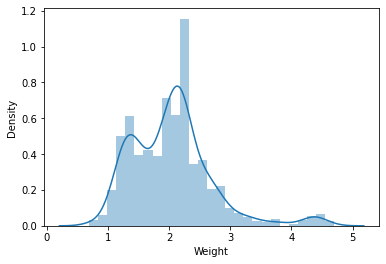

In [473]:
sns.distplot(df['Weight'])

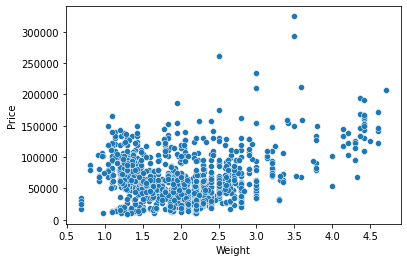

In [474]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

PRICE ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


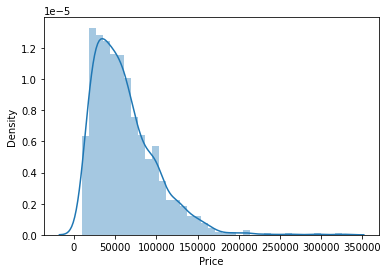

In [475]:
sns.distplot(df['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


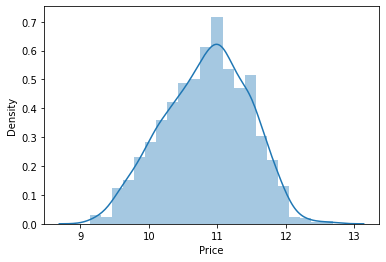

In [476]:
sns.distplot(np.log(df['Price']))

In [477]:
df.corr()['Price']

Ram            0.738560
Weight         0.212422
Price          1.000000
TouchScreen    0.189221
IPS Panel      0.250803
X_res          0.550804
Y_res          0.547695
PPI            0.469676
HDD           -0.099345
SSD            0.669465
Name: Price, dtype: float64

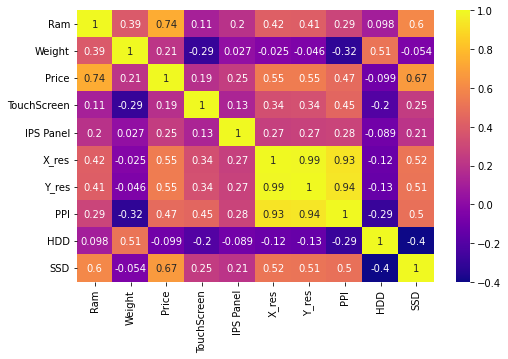

In [478]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='plasma')

In [479]:
df.drop(['X_res','Y_res'],axis=1,inplace=True)

In [488]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS Panel,PPI,CPU_name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac OS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac OS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac OS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac OS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


MODEL BUILDING

In [490]:
# Creating dummy variable for categorical variables- season, month, weekofdays, year, holidays, functional day
Company = pd.get_dummies(df['Company'])
TypeName = pd.get_dummies(df['TypeName'])
OpSys = pd.get_dummies(df['OpSys'])
CPU_name = pd.get_dummies(df['CPU_name'])
Brand = pd.get_dummies(df['Brand'])

KeyError: ignored

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree



In [358]:
y=np.log(df['Price'])
X=df.drop(['Price'],axis=1)

In [359]:

model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.show()

ValueError: ignored

In [124]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.15,random_state=2)

X_train.shape,X_test.shape




((1106, 12), (196, 12))

In [125]:
mapper={i:value for i,value in enumerate(X_train.columns)}

In [126]:
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS Panel',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu Brand'}

LINEAR REGRESSION

In [127]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=LinearRegression()

pipe=Pipeline([('step1',step1),('step2',step2)])


pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418602
MAE 0.21017827976428904


Ridge Regression

In [128]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=Ridge(alpha=5)

pipe=Pipeline([('step1',step1),('step2',step2)])


pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8118193980779095
MAE 0.20918805545305547


Lasso Regression

In [129]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=Lasso(alpha=0.001)

pipe=Pipeline([('step1',step1),('step2',step2)])


pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8071857196899417
MAE 0.2111435071691317


DECISION TREE

In [130]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=DecisionTreeRegressor(max_depth=8)

pipe=Pipeline([('step1',step1),('step2',step2)])


pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8418180233134251
MAE 0.1811614592748571


RANDOM FOREST

In [131]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])],remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe=Pipeline([('step1',step1),('step2',step2)])


pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8851499847098487
MAE 0.15870252595141304


In [132]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [133]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS Panel,PPI,CPU_name,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Mac OS,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac OS,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Others,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac OS,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac OS,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


HYPERPARAMETER TUNING FOR RANDOM FOREST

In [134]:
indexlist=[0,1,3,8,11]
transformlist=[]
for key , value in mapper.item():
       if key in indexlist:
         transformlist.append(value)

transformlist

AttributeError: ignored